<a href="https://colab.research.google.com/github/dajley/IQR-Method/blob/main/Analyzing_Outliers_with_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Analyzing Impact of Outlier Detection on Predictive Performance of Machine Learning Models
#Research and Code by Dajanique Leysath

In [25]:
#Import libraries

#Pandas is used for data manipulation and analysis
import pandas as pd

#NumPy is used for scientific computing
import numpy as np

#Matplotlib is used for interactive plots
#Pyplot function make changes to figures
import matplotlib.pyplot as plt

#Seabron creates attractive and statistical graphics
import seaborn as sns

#SciPy provides inbuilt functions to calculate Skewness and Kurtosis
#import scipy.stats as stats
#from scipy.stats import skew, kurtosis


In [7]:
#Mounts Google Drive to Google Colab
from google.colab import drive
drive.mount("/drive")

Mounted at /drive


In [8]:
#Saves CSV file into dataframe
df = pd.read_csv("/drive/MyDrive/Datasets/Combined County Data Cleansed.csv")
df

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
0,104.9,60.9285,37.1985,49.0635,50.2490,50.8615,7.8580,23.1800,489.1580,0.1835,5.6170,1.3810,34.8855,46.0855
1,59.7,53.1395,31.8545,42.4970,47.2270,46.5050,9.8660,28.0395,447.4045,0.1910,5.8490,2.2715,30.7485,37.6335
2,43.0,60.1670,33.7200,46.9435,52.5145,51.8025,7.5750,23.9520,442.3180,0.2075,6.3380,2.1860,28.4045,44.6370
3,76.8,58.6490,32.1940,45.4220,52.1705,48.8195,8.3395,25.6365,488.8215,0.2055,6.2715,0.7400,30.5045,42.3990
4,94.9,57.2660,34.1885,45.7275,49.0000,47.4995,7.5190,23.1775,396.1995,0.1680,5.1335,2.2735,32.6630,42.4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,117.1,62.7390,36.9900,49.8645,51.3840,42.9890,10.7280,26.8820,511.3620,0.2350,7.1915,0.9650,36.1970,47.0220
282,39.7,60.0255,35.2670,47.6465,48.9125,43.6705,8.9215,23.2990,427.6245,0.1820,5.5765,2.5450,36.7735,44.8625
283,65.1,62.0395,35.7990,48.9195,50.1140,47.6505,10.8985,21.7265,448.2195,0.2285,6.9955,0.7300,34.6885,44.7150
284,98.6,63.8520,40.2650,52.0590,52.7185,51.1560,10.7980,21.0045,418.0985,0.1990,6.0710,2.3815,40.1690,48.5900


**Explatory Data Analysis (EDA)**

In [10]:
#Shows basic summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Value               286 non-null    float64
 1   Avg Max Temp        286 non-null    float64
 2   Avg Min Temp        286 non-null    float64
 3   Avg Temp            286 non-null    float64
 4   Avg Bare Soil Temp  286 non-null    float64
 5   Avg Turf Soil Temp  286 non-null    float64
 6   Avg Wind Speed      286 non-null    float64
 7   Avg Max Wind Speed  286 non-null    float64
 8   Total Solar Rad     286 non-null    float64
 9   Avg Penman PET      286 non-null    float64
 10  Total Penman PET    286 non-null    float64
 11  Total Rainfall      286 non-null    float64
 12  Avg Dew Point       286 non-null    float64
 13  Avg Wind Chill      286 non-null    float64
dtypes: float64(14)
memory usage: 31.4 KB


In [12]:
#Checks to see if there are any null values
df.isnull().sum()

,0
Value,0
Avg Max Temp,0
Avg Min Temp,0
Avg Temp,0
Avg Bare Soil Temp,0
Avg Turf Soil Temp,0
Avg Wind Speed,0
Avg Max Wind Speed,0
Total Solar Rad,0
Avg Penman PET,0


In [13]:
#Shows how many unique values are in each feature
df.nunique()

,0
Value,250
Avg Max Temp,198
Avg Min Temp,198
Avg Temp,197
Avg Bare Soil Temp,197
Avg Turf Soil Temp,197
Avg Wind Speed,194
Avg Max Wind Speed,195
Total Solar Rad,198
Avg Penman PET,132


**Identifying Data Distribution**

**Descriptive Statistics**: Mean, Median, Standard Deviation, Skewness, and Kurtosis

The **mean** and **median** can help identify the central tendency of the data.

The **standard deviation** indicates how data points are disperced around the central value.

In [11]:
#Shows basic stats on dataset
df.describe()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,94.711538,59.099552,35.918376,47.506944,49.042607,46.393213,9.866484,25.079365,448.886152,0.198280,6.067767,1.883360,34.407533,43.819885
std,35.748752,3.773902,2.773045,3.045846,3.455934,4.063401,1.259208,2.396947,32.467450,0.027049,0.827335,1.055247,3.096325,3.926210
min,25.400000,49.942500,29.261500,40.661500,39.873500,36.401000,7.519000,18.379000,362.750000,0.138500,4.244000,0.192500,26.804500,34.539500
25%,66.300000,56.588000,33.665750,45.205000,46.461250,43.298375,9.031375,23.834875,427.737875,0.180500,5.535125,0.970000,32.714625,40.730250
50%,92.450000,59.881250,35.962750,47.671000,49.115000,46.565250,9.871500,25.149250,446.897000,0.202250,6.168250,1.707250,34.651500,44.318750
75%,120.625000,61.739375,37.861125,49.736500,51.818000,49.457000,10.669875,26.591375,475.160500,0.218500,6.685500,2.514125,36.387750,46.477000
max,198.000000,67.994000,42.368500,54.553000,57.404000,55.556000,14.441500,36.001000,536.538000,0.248500,7.669000,6.194500,42.040500,52.869500


In [29]:
#Shows the median of each feature
df.median()

,0
Value,92.45000
Avg Max Temp,59.88125
Avg Min Temp,35.96275
Avg Temp,47.67100
Avg Bare Soil Temp,49.11500
Avg Turf Soil Temp,46.56525
Avg Wind Speed,9.87150
Avg Max Wind Speed,25.14925
Total Solar Rad,446.89700
Avg Penman PET,0.20225


The **Skewness** measures the asymmetry of the data distribution.

The **Kurtosis** measures the peaakedness or flatness of the distribution.

In [28]:
#Calculates the skewness
skew = df.skew()
print(skew)
#print(skew(df)) --> prints the skew values without feature names

Value                 0.318464
Avg Max Temp         -0.258031
Avg Min Temp          0.098246
Avg Temp              0.049892
Avg Bare Soil Temp   -0.137111
Avg Turf Soil Temp   -0.126948
Avg Wind Speed        0.550337
Avg Max Wind Speed    0.434659
Total Solar Rad       0.046374
Avg Penman PET       -0.337436
Total Penman PET     -0.321591
Total Rainfall        0.915102
Avg Dew Point        -0.198629
Avg Wind Chill       -0.087083
dtype: float64


In [23]:
#calculates the kurtosis
kurtosis = df.kurtosis()
print(kurtosis)

Value                -0.309842
Avg Max Temp         -0.405412
Avg Min Temp         -0.623781
Avg Temp             -0.698781
Avg Bare Soil Temp   -0.590043
Avg Turf Soil Temp   -0.544708
Avg Wind Speed        0.817949
Avg Max Wind Speed    2.767803
Total Solar Rad      -0.372088
Avg Penman PET       -0.721769
Total Penman PET     -0.701188
Total Rainfall        0.859633
Avg Dew Point        -0.223580
Avg Wind Chill       -0.532499
dtype: float64


In [14]:
#Shows how correlated each feature is to each other
df.corr()

,Value,Avg Max Temp,Avg Min Temp,Avg Temp,Avg Bare Soil Temp,Avg Turf Soil Temp,Avg Wind Speed,Avg Max Wind Speed,Total Solar Rad,Avg Penman PET,Total Penman PET,Total Rainfall,Avg Dew Point,Avg Wind Chill
Value,1.000000,-0.114121,0.017959,-0.061331,-0.228821,-0.332270,0.027308,0.109507,-0.150490,-0.207645,-0.206967,0.179414,0.136577,-0.067075
Avg Max Temp,-0.114121,1.000000,0.724030,0.949316,0.849990,0.684369,-0.224368,-0.247643,0.290263,0.738079,0.737178,-0.135603,0.382225,0.957011
Avg Min Temp,0.017959,0.724030,1.000000,0.903980,0.606540,0.583659,-0.111692,-0.297559,-0.096499,0.249618,0.249573,0.225344,0.791173,0.858445
Avg Temp,-0.061331,0.949316,0.903980,1.000000,0.803402,0.690781,-0.189896,-0.287289,0.136503,0.571274,0.570678,0.018768,0.596849,0.984258
Avg Bare Soil Temp,-0.228821,0.849990,0.606540,0.803402,1.000000,0.799243,-0.279467,-0.188760,0.319015,0.633735,0.632258,-0.141759,0.301400,0.837696
Avg Turf Soil Temp,-0.332270,0.684369,0.583659,0.690781,0.799243,1.000000,-0.287460,-0.211398,0.214323,0.486544,0.486589,-0.068161,0.245580,0.721284
Avg Wind Speed,0.027308,-0.224368,-0.111692,-0.189896,-0.279467,-0.287460,1.000000,0.647293,-0.093411,0.079313,0.078896,0.215829,-0.033135,-0.317008
Avg Max Wind Speed,0.109507,-0.247643,-0.297559,-0.287289,-0.188760,-0.211398,0.647293,1.000000,0.065805,0.141740,0.136886,0.051453,-0.327432,-0.332997
Total Solar Rad,-0.150490,0.290263,-0.096499,0.136503,0.319015,0.214323,-0.093411,0.065805,1.000000,0.602456,0.609541,-0.464572,-0.285443,0.162490
Avg Penman PET,-0.207645,0.738079,0.249618,0.571274,0.633735,0.486544,0.079313,0.141740,0.602456,1.000000,0.999686,-0.314908,-0.221080,0.579469


**Visualizations**

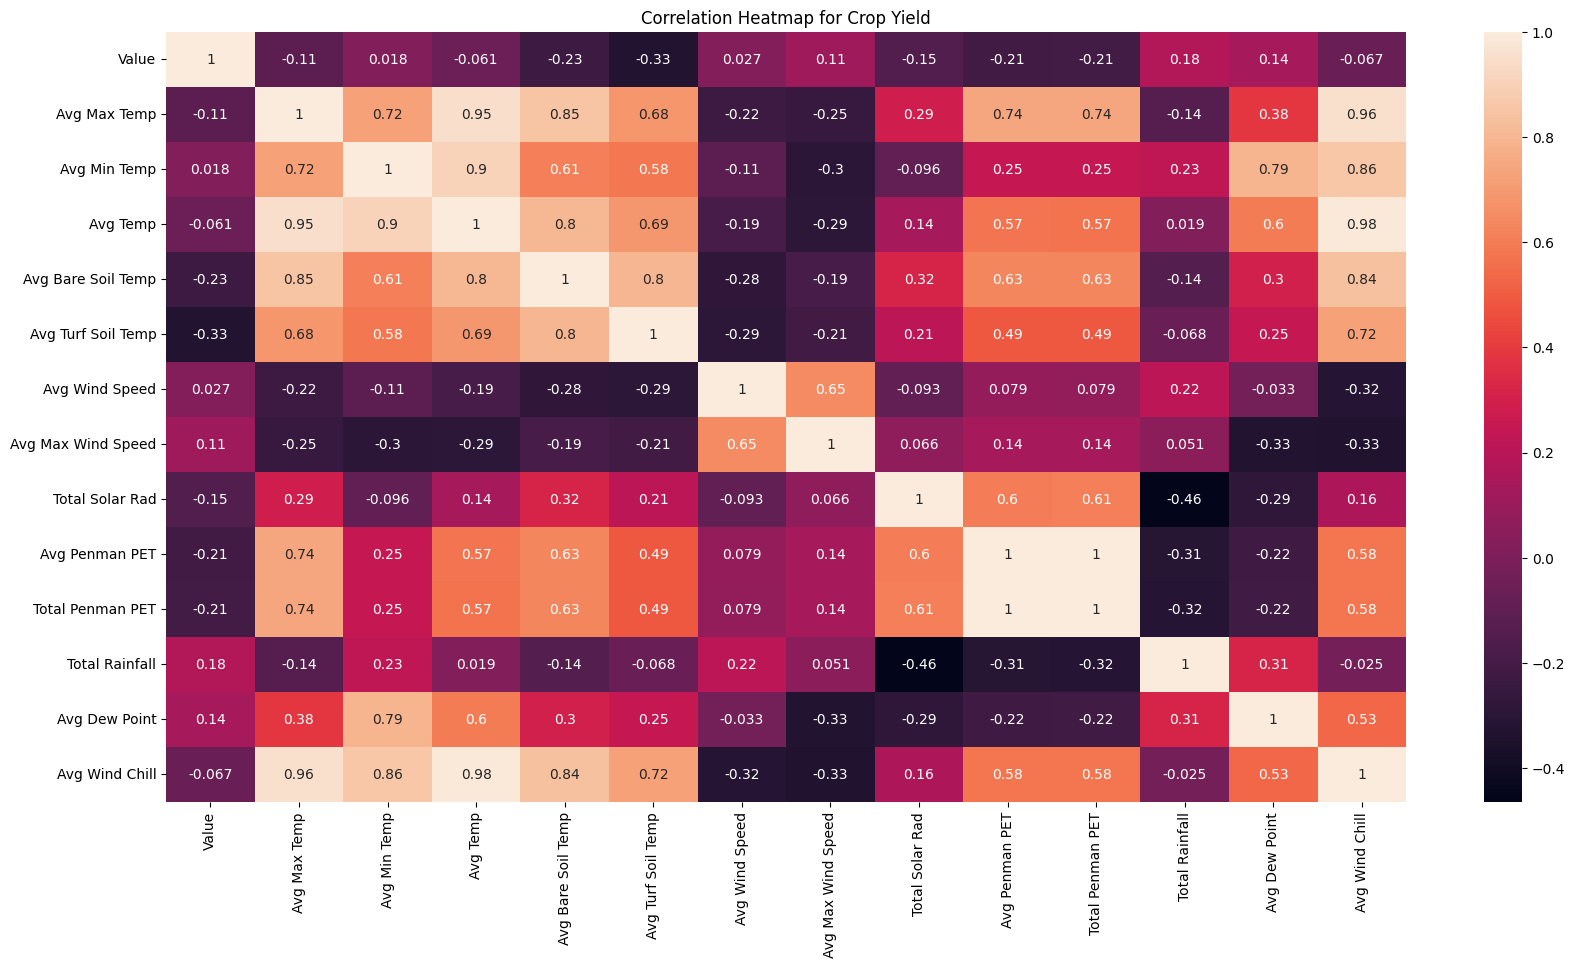

In [32]:
#Shows heatmap of correlation between features
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap for Crop Yield")

#Adjusts size of heatmap
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()